# Item Store Analysis

### Fortnite Battle Royale

Fortnite Battle Royale by Epic Games is one of the most sucessful games in the battle royale genre. Released in 2017, it has been a huge success, with over 350 million players worldwide. The game is free to play, but it has a monetization system based on the sale of cosmetic items, such as skins, emotes, pickaxes, gliders, etc. These items are sold in the Item Shop, which is updated daily with new items. The items are sold for V-Bucks, the in-game currency, which can be bought with real money. The game has had so far 4 chapters divided in different numbers of seasons (https://fortnite.fandom.com/wiki/Seasons).

### What

An analysis of the Fortnite Battle Royale item shop from the perspective of economic game design.

This study intends to cover the availability and monetization of the items daily on sale for Fortnite Battle Royale.

### How

By scraping, cleaning and organising the data available on a fandom website (https://fnbr.co/shop) and exploring availability, seasonality, price range, spending depth, etc. over time to gather insights and answer questions from the game development perspective.

### Why

One of the common practices when designing and developing new games is to study the most successful games in that genre, the so called benchmarks, to get a better understanding of their monetization system and what is needed in the different stages of the game development and adoption.

## Questions

Let's start by defining the questions we want to answer with this analysis.

From the game developent and economic design perspective, those are the most importat questions to answer. They will help us understand the monetization system and the content creation needs over time:

- How much content needs to be done over time? And for each season?
- What is the spend depth (or store value) per day? Per season?

Along with those, there are some other questions that will help us understand the item shop and its evolution over time:

- How much content is actually new? How many is repeated? How often?
- How is the distribution of item types? And rarity?
- How did the distribution of item types change over time?
- What is the price range for each rarity over time?
- When did IPs get introduced?
- How much value comes from new items? From repeated items?

### Hypothesis

The item shop started smaller, with a few items and less variety, and grew over time to reach profitability.

### Libraries and settings

In [1]:
# Library imports and settings
import numpy as np
import pandas as pd
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import os
import warnings
warnings.filterwarnings('ignore')

#plt.rcParams.update({"figure.dpi": 150}) # set dpi for all figures
#sns.despine() # remove top and right spines from plots
#plt.style.use("dark_background")

os.getcwd() # get current working directory

'/Users/gdbr/Documents/Hyper Island/DA24STO/Modules/12. Individual Project/fortnite-store-analysis'

## 1. Data

In [2]:
# Load the data
# Because name field may contain commas, single quotes and double quotes, we used "*" as quotechar in the csv file
# Not the most elegant solution, but gets the job done
df = pd.read_csv(os.getcwd() + '/csv/' + 'store.csv', quotechar="*")

display(df)

,date,rarity,item_type,name,cost
0,2022-06-15,rare,outfit,Jellie,1200
1,2022-06-15,rare,outfit,Scimitar,1200
2,2022-06-15,rare,wrap,Emblem,500
3,2022-06-15,common,wrap,Rainbow Bubblegum,300
4,2022-06-15,uncommon,pickaxe,Fit Stick,500
...,...,...,...,...,...
85516,2023-07-04,uncommon,outfit,Crustina,800
85517,2023-07-04,epic,glider,Flying Saucer,1200
85518,2023-07-04,rare,glider,Flappy Flyer,800
85519,2023-07-04,rare,glider,Ice Cream Cruiser,800


### 1.1 Include chapters and seasons

In [3]:
# Load the csv file containing the chapters, seasons, start date and end date for each chapter and season
df_seasons = pd.read_csv(os.getcwd() + '/csv/' + 'seasons.csv')

# Convert the start date and end date columns to datetime
df_seasons['start_date'] =  pd.to_datetime(df_seasons['start_date'], format='%Y-%m-%d')
df_seasons['end_date'] =  pd.to_datetime(df_seasons['end_date'], format='%Y-%m-%d')

display(df_seasons)

,chapter,season,start_date,end_date
0,1,1,2017-10-16,2017-12-13
1,1,2,2017-12-14,2018-02-21
2,1,3,2018-02-22,2018-04-30
3,1,4,2018-05-01,2018-07-11
4,1,5,2018-07-12,2018-09-26
5,1,6,2018-09-27,2018-12-05
6,1,7,2018-12-06,2019-02-27
7,1,8,2019-02-28,2019-05-08
8,1,9,2019-05-09,2019-07-31
9,1,10,2019-08-01,2019-10-13


In [4]:
# For each item in df, include the chapter and season
df['chapter'] = df['date'].map(lambda x: df_seasons[df_seasons['start_date'] <= x]['chapter'].iloc[-1])
df['season'] = df['date'].map(lambda x: df_seasons[df_seasons['start_date'] <= x]['season'].iloc[-1])

display(df)

,date,rarity,item_type,name,cost,chapter,season
0,2022-06-15,rare,outfit,Jellie,1200,3,3
1,2022-06-15,rare,outfit,Scimitar,1200,3,3
2,2022-06-15,rare,wrap,Emblem,500,3,3
3,2022-06-15,common,wrap,Rainbow Bubblegum,300,3,3
4,2022-06-15,uncommon,pickaxe,Fit Stick,500,3,3
...,...,...,...,...,...,...,...
85516,2023-07-04,uncommon,outfit,Crustina,800,4,3
85517,2023-07-04,epic,glider,Flying Saucer,1200,4,3
85518,2023-07-04,rare,glider,Flappy Flyer,800,4,3
85519,2023-07-04,rare,glider,Ice Cream Cruiser,800,4,3


### 1.2 Preparation

In [5]:
# Is there any missing data?
df.isnull().values.any()

False

In [6]:
# Convert the date column to datetime; add year, quarter, month, week columns
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')
df['year'] =  df['date'].map(lambda x:x.year)
df['quarter'] =  df['date'].map(lambda x:x.quarter)
df['month'] =  df['date'].map(lambda x:x.month)
df['week'] =  df['date'].map(lambda x:x.week)

# Group the IPs (dc, marvel and star_wars) into one category (dc_m_sw)
df['rarity_v2'] = df['rarity'].map(lambda x: 'dc_m_sw' if x in ['dc', 'marvel', 'star_wars'] else x)

df = df.sort_values('date')

# Mark the first occurence of each item
df_first_occurence = df.drop_duplicates('name')
df['first'] = np.where(df.index.isin(df_first_occurence.index),True, False) # https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

# Add a column with the number of occurences for each item at that point in time
df['one'] = 1
df['occurence'] = df.groupby('name')['one'].transform('cumsum')

# Drop the item if the cost is -1, which means that it didn't have a valid price
df = df[df.cost != -1]

# Add a column with the price of each item in USD
df['USD'] =  df['cost'] / (1000 / 7.99) # 1000 V-Bucks currently cost USD 7,99 - https://store.epicgames.com/en-US/p/fortnite--1000-v-bucks
df['USD'] = df['USD'].round(2)

display(df)

,date,rarity,item_type,name,cost,chapter,season,year,quarter,month,week,rarity_v2,first,one,occurence,USD
30638,2017-10-30,epic,outfit,Ghoul Trooper,1500,1,1,2017,4,10,44,epic,True,1,1,11.98
30639,2017-10-30,epic,outfit,Skull Trooper,1500,1,1,2017,4,10,44,epic,True,1,1,11.98
30640,2017-10-30,rare,outfit,First strike Specialist,1200,1,1,2017,4,10,44,rare,True,1,1,9.59
30641,2017-10-30,rare,outfit,Recon Expert,1200,1,1,2017,4,10,44,rare,True,1,1,9.59
30642,2017-10-30,uncommon,glider,Petunia,500,1,1,2017,4,10,44,uncommon,True,1,1,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16190,2023-09-18,dc,outfit,Catwoman Comic Book Outfit,1500,4,4,2023,3,9,38,dc_m_sw,False,1,47,11.98
16191,2023-09-18,dc,bundle,Catwoman (Bundle),1800,4,4,2023,3,9,38,dc_m_sw,False,1,30,14.38
16192,2023-09-18,dc,pickaxe,Speed Force Slashers,1200,4,4,2023,3,9,38,dc_m_sw,False,1,81,9.59
16185,2023-09-18,dc,outfit,Catwoman Zero,1200,4,4,2023,3,9,38,dc_m_sw,False,1,66,9.59


## 2. Exploratory Data Analysis

In [7]:
# How many days?
df['date'].nunique()

2148

In [8]:
# Is any date missing?
pd.date_range(start=df['date'].min(), end=df['date'].max()).difference(df['date'])

DatetimeIndex(['2018-05-09', '2019-10-14'], dtype='datetime64[ns]', freq=None)

In [9]:
# What are the rarity and item types?
display(df['rarity'].unique())
display(df['item_type'].unique())

array(['epic', 'rare', 'uncommon', 'legendary', 'slurp', 'marvel', 'dark',
       'icon_series', 'frozen', 'shadow', 'gaming_legends', 'dc',
       'star_wars', 'lava', 'common'], dtype=object)

array(['outfit', 'glider', 'pickaxe', 'emote', 'misc', 'backpack',
       'bundle', 'wrap', 'toy', 'pet', 'music', 'skydive', 'banner',
       'loading', 'spray', 'emoji'], dtype=object)

In [10]:
# How many rarity types?
df['rarity'].nunique()

15

In [11]:
# How many item types?
df['item_type'].nunique()

16

In [12]:
# Number of unique items — assuming names act like unique id
df['name'].nunique()

3386

In [13]:
# How many free items are there?
df.loc[df['cost'] == 0].shape[0]

400

In [14]:
# What's the percentage of free items?
# len(df.loc[df['cost'] == 0]) / len(df)
df.loc[df['cost'] == 0].shape[0] / df.shape[0]

0.0046779248725265475

In [15]:
# How many items are there per rarity?
df.groupby('rarity')['name'].count()

rarity
common               19
dark                287
dc                 2992
epic              14886
frozen                9
gaming_legends     2512
icon_series        7116
lava                 38
legendary          3044
marvel             7616
rare              26136
shadow              259
slurp               354
star_wars          2588
uncommon          17652
Name: name, dtype: int64

In [16]:
# How many unique items are there per rarity?
df.groupby('rarity')['name'].nunique()

rarity
common               1
dark                 8
dc                  59
epic               603
frozen               1
gaming_legends      95
icon_series        229
lava                 2
legendary           93
marvel             127
rare              1247
shadow              10
slurp               11
star_wars           59
uncommon           843
Name: name, dtype: int64

In [17]:
# How many items are there per item type?
df.groupby('item_type')['name'].count()

item_type
backpack     1455
banner         20
bundle       8214
emoji          14
emote       13674
glider       7255
loading        64
misc          102
music         672
outfit      32004
pet             7
pickaxe     15867
skydive        83
spray         129
toy             1
wrap         5947
Name: name, dtype: int64

In [18]:
# How many unique items are there per item type?
df.groupby('item_type')['name'].nunique()

item_type
backpack      79
banner         6
bundle       374
emoji          1
emote        496
glider       247
loading        6
misc           1
music         70
outfit      1176
pet            1
pickaxe      601
skydive        4
spray          6
toy            1
wrap         321
Name: name, dtype: int64

In [19]:
# Cost breakdown of items: 
df['USD'].describe()

count    85508.000000
mean         8.190683
std          4.681961
min          0.000000
25%          4.000000
50%          6.390000
75%         11.980000
max         32.600000
Name: USD, dtype: float64

## 3. Summary

### Data:

- 2148 days of items on sale from 2017-10-30 to 2023-09-18 (only two days are missing in the store)
- Source of the data: https://fnbr.co/shop
- Source of the chapter/seasons dates: https://fortnite.fandom.com/wiki/Seasons
- Total items: 85508 (13 dropped items because of missing cost)
- Total unique items: 3386
- Free items: 400 (less then 0,5%)

### 3.1 History

Overview of the game’s store from “inception”.

- Since 2017-10-30, more than 3300 items and bundles have been showcased. These items have collectively appeared in the store more than 85,000 times.
- Once an item is released, its prices remain unchanged. With the exception of only 4 items, the minimum and maximum prices for each item have remained constant.

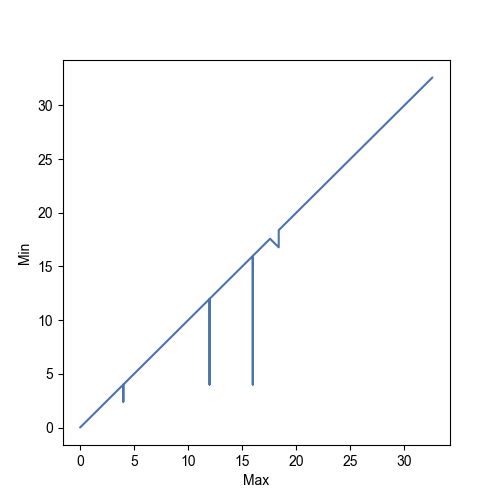

In [20]:
df_price_changes= df.groupby(['name']).agg(Mean=('USD','mean'), Max=('USD','max'), Min=('USD','min'))
df_price_changes_sorted = df_price_changes.sort_values('Mean')
f, ax = plt.subplots(figsize=(5,5))
ax.tick_params()
p3 = so.Plot(df_price_changes, 'Max', 'Min')
p3.add(so.Line()).on(ax).show()

In [21]:
df_price_changes['delta'] = df_price_changes['Max'] - df_price_changes['Min']
df_price_changes.loc[df_price_changes['delta'] != 0]

,Mean,Max,Min,delta
name,,,,
Anakin Skywalker (Bundle),17.166207,18.38,16.78,1.60
Blaze,10.029333,11.98,4.00,7.98
Lucky,3.620339,4.00,2.40,1.60
Raptor,14.010685,15.98,4.00,11.98


## 4. Analysis

### 4.1 Store

Since the beginning of the game, the mean item price has not drifted much an remained around USD 8. The bounds however have increased over time.

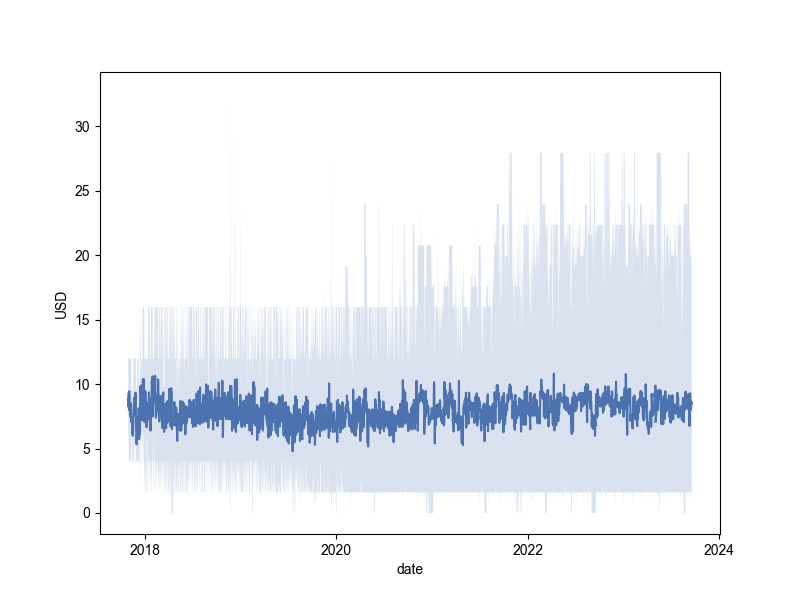

In [22]:
# Item price, average and interval
f, ax = plt.subplots(figsize=(8,6))
pCost = so.Plot(df, 'date', 'USD')
pCost.add(so.Line(), so.Agg()).add(so.Band()).on(ax).show() # https://seaborn.pydata.org/examples/errorband_lineplots.html

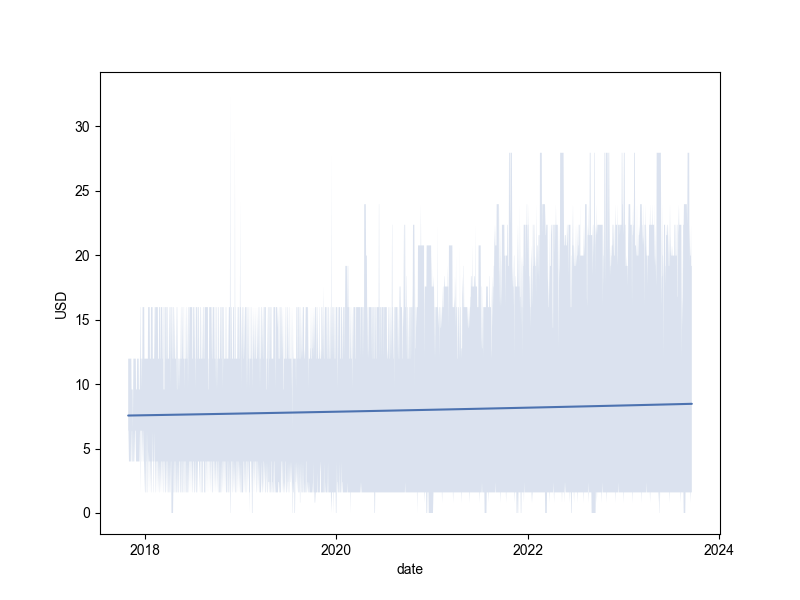

In [23]:
# Item price, polyfit and interval
f, ax = plt.subplots(figsize=(8,6))
pCost = so.Plot(df, 'date', 'USD')
pCost.add(so.Line(), so.PolyFit()).add(so.Band()).on(ax).show() # https://seaborn.pydata.org/examples/errorband_lineplots.html

The daily store value, however, increased greatly. 

- Each dot shows the total store value for a given day
- The coloring of the dots represents the mean number of times each items in the store has been previously displayed.
- Late 2020 there was a change made to reintroduce old items and increase mean daily store value

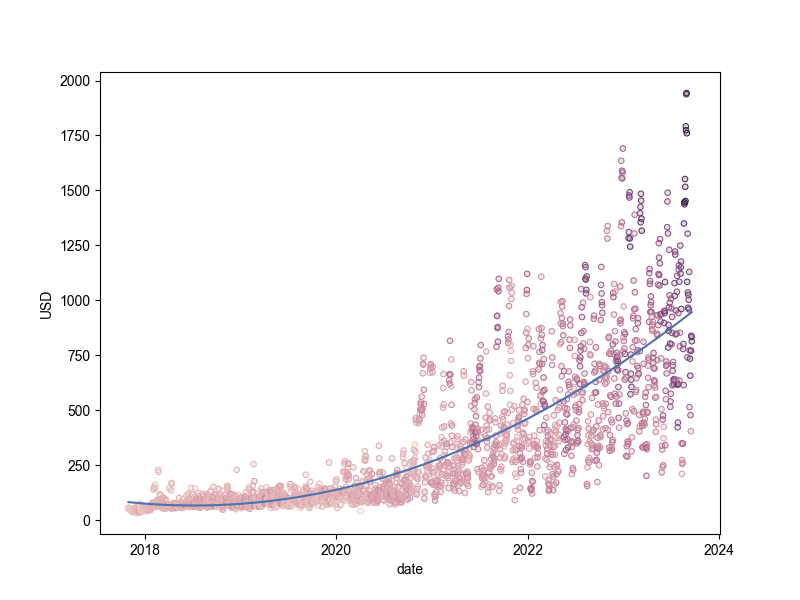

In [24]:
# Daily store value
daily_store_value_and_age = df.groupby('date').agg({'USD':'sum', 'occurence':'mean', 'one':'sum'})
#daily_store_value_and_age['avg_item_USD'] = daily_store_value_and_age['USD'] / daily_store_value_and_age['one']

f, ax = plt.subplots(figsize=(8,6))
pCost = so.Plot(daily_store_value_and_age, 'date', 'USD')
pCost.add(so.Dots(),color='occurence', legend=False).add(so.Line(), so.PolyFit()).on(ax).show()

This is explained by a great increase in number of items per day.

Here we can easily see how the store volume increases from late 2020.

- New items are displayed in bright color, old items in dark.

Take note of the changing daily variance in the number of displayed items after 2021, ranging from approximately 25 to 175 items displayed per day.

Observe the significant increase in content reuse starting in late 2021.

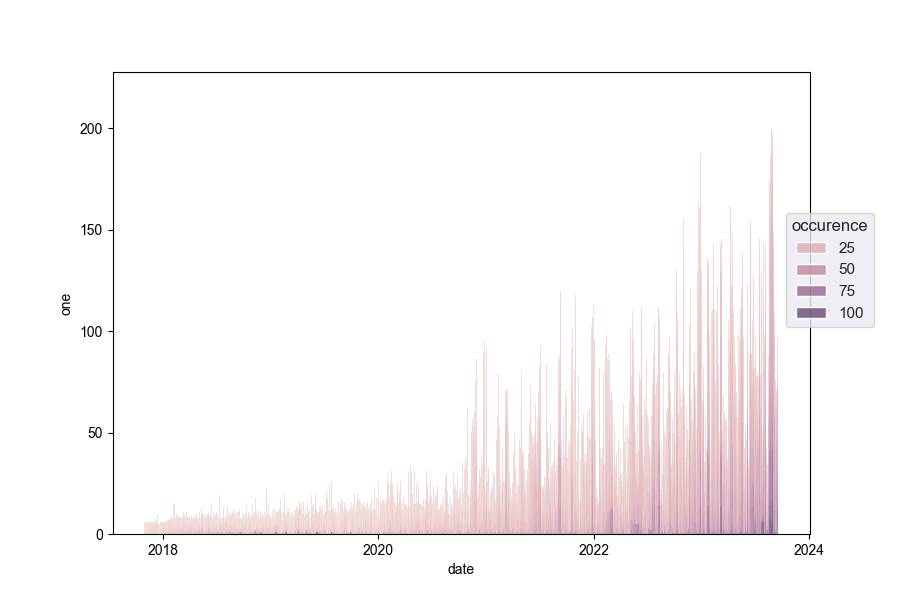

In [25]:
# Occurence of each item # Dark is old, bright is new
df_sorted_by_occurence = df.sort_values('occurence', ascending=False)
f, ax = plt.subplots(figsize=(9,6))
pCost = so.Plot(df_sorted_by_occurence, 'date', 'one')
pCost.add(so.Bars(), so.Stack(), color='occurence').on(ax).show()

The number of new daily items doesn't follow the store growth. Actually, it decreases slightly after 2020.

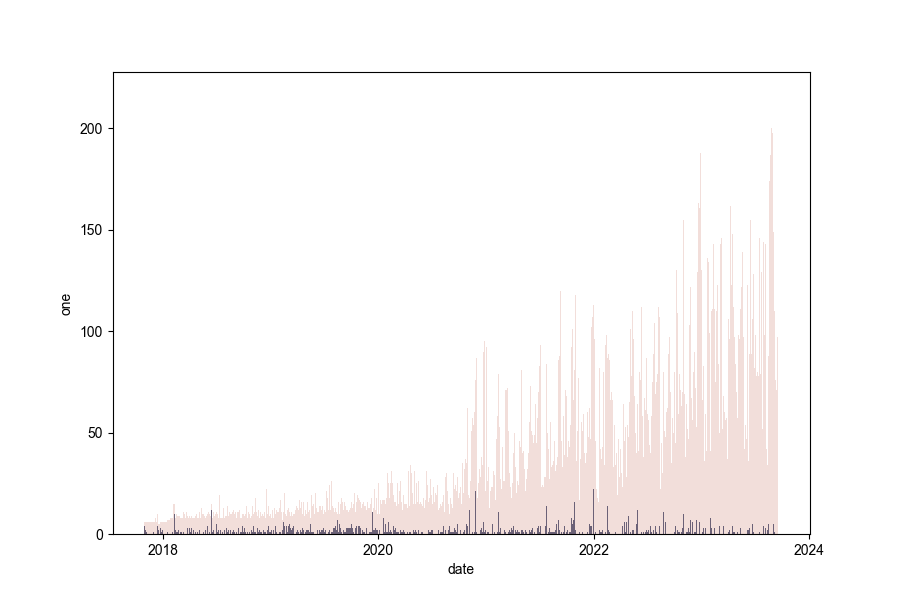

In [26]:
# Num items in the store New = Dark, Old = Bright
df_sorted_by_first = df.sort_values("first", ascending=False)
f, ax = plt.subplots(figsize=(9,6))
ax.tick_params()

plot = so.Plot(df_sorted_by_first, "date", "one")
plot.add(so.Bars(edgewidth=0),  so.Stack(), color="first", legend=False).on(ax).show()

### 4.2 Production

Since inception, outfits have been the #1 item type in the store.

- Only the top 7 common item types are shown
- Note the increase of bundles in late 2021.

<Axes: xlabel='date', ylabel='cumsum'>

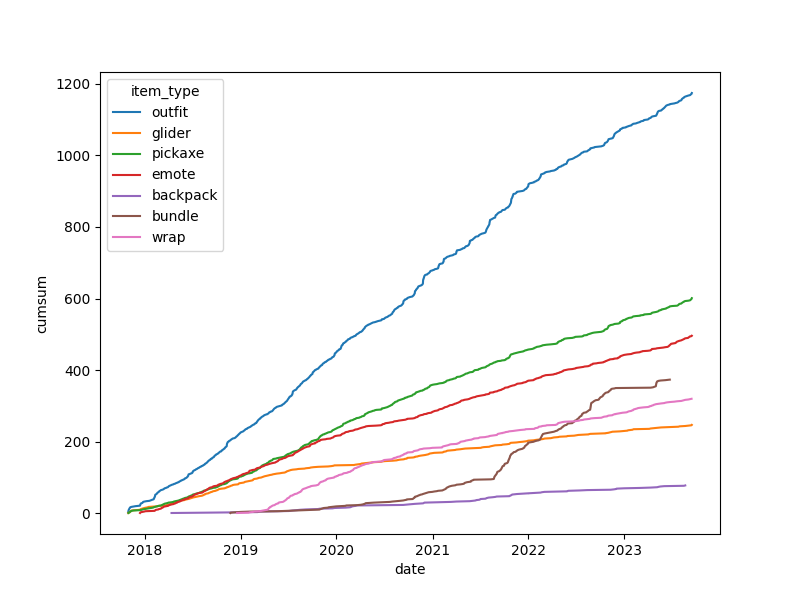

In [27]:
# New content each month of types
df_filtered = df.loc[(df['first']==True) & (-df['item_type'].isin(['skydive', 'music', 'spray', 'loading', 'emoji', 'pet', 'banner', 'toy', 'misc']))]
df_filtered['cumsum'] = df_filtered.groupby(['item_type'])['one'].transform('cumsum')
f, ax = plt.subplots(figsize=(8,6))
sns.lineplot(df_filtered, x='date', y='cumsum', hue='item_type')

And there has been more and more new outfits each month.

- Distributions of number of each item types produced per month for period.

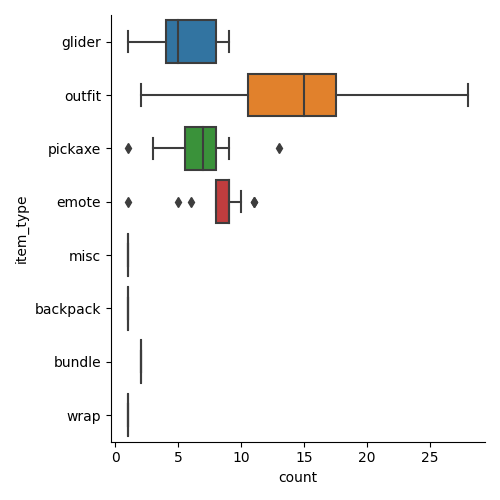

In [28]:
# New content each month of types in 2017 and 2018
df_grouped = df.loc[(df["first"]==True) & (df["year"] < 2019)].groupby(["year","month","item_type"], as_index=False).agg(dt_max=("date","min"), count=("one","sum"))
df_grouped["y_m"] = df_grouped["year"].astype(str) + df_grouped["month"].astype(str)

sns.catplot(df_grouped, kind="box", y="item_type", x="count")

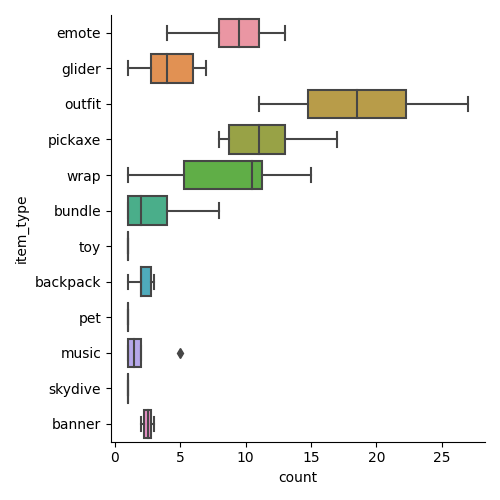

In [29]:
# New content each month of types in 2019
df_grouped = df.loc[(df["first"]==True) & (df["year"] == 2019)].groupby(["year","month","item_type"], as_index=False).agg(dt_max=("date","min"), count=("one","sum"))
df_grouped["y_m"] = df_grouped["year"].astype(str) + df_grouped["month"].astype(str)

sns.catplot(df_grouped, kind="box", y="item_type", x="count")

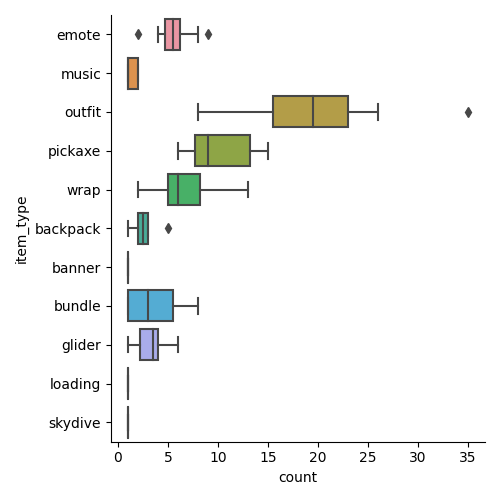

In [30]:
# New content each month of types in 2020
df_grouped = df.loc[(df["first"]==True) & (df["year"] == 2020)].groupby(["year","month","item_type"], as_index=False).agg(dt_max=("date","min"), count=("one","sum"))
df_grouped["y_m"] = df_grouped["year"].astype(str) + df_grouped["month"].astype(str)

sns.catplot(df_grouped, kind="box", y="item_type", x="count")

However, in 2021 the number of new bundles started to catch up.

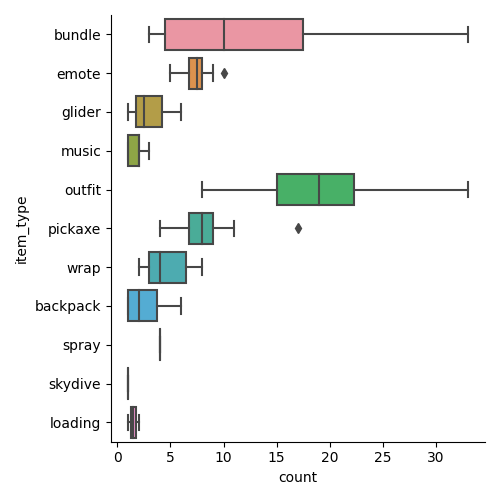

In [31]:
# New content each month of types in 2021
df_grouped = df.loc[(df["first"]==True) & (df["year"] == 2021)].groupby(["year","month","item_type"], as_index=False).agg(dt_max=("date","min"), count=("one","sum"))
df_grouped["y_m"] = df_grouped["year"].astype(str) + df_grouped["month"].astype(str)

sns.catplot(df_grouped, kind="box", y="item_type", x="count")

From 2022 onwards, bundles are the most produced item type.

That's important, because bundles are more expensive than outfits while they also can reintroduce old items.

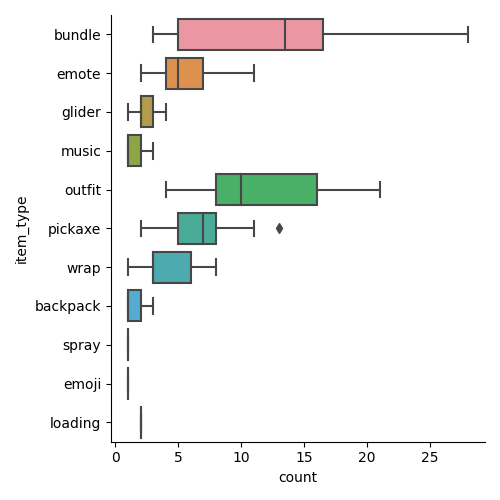

In [32]:
# New content each month of types from 2022 onwards
df_grouped = df.loc[(df["first"]==True) & (df["year"] > 2021)].groupby(["year","month","item_type"], as_index=False).agg(dt_max=("date","min"), count=("one","sum"))
df_grouped["y_m"] = df_grouped["year"].astype(str) + df_grouped["month"].astype(str)

sns.catplot(df_grouped, kind="box", y="item_type", x="count")

### 4.3 Pacing

For each year, the store's daily number of items increases. But since the number of new items doesn't follow the same trend, reintroducing old items is in fact the way to keep up with the store growth.

- Shows distributions of daily number of items displayed for each year.

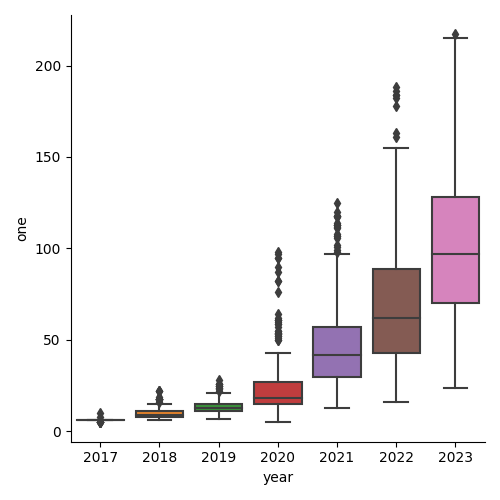

In [33]:
sns.catplot(df.groupby(["year","date"],as_index=False).sum(), kind="box", y="one", x="year")

And since 2022 the store shows ~28 outfits per day.

- dc_m_sw is short for DC, Marvel and Star Wars
- Data date range is [2022, now)

<Axes: xlabel='item_type', ylabel='rarity_v2'>

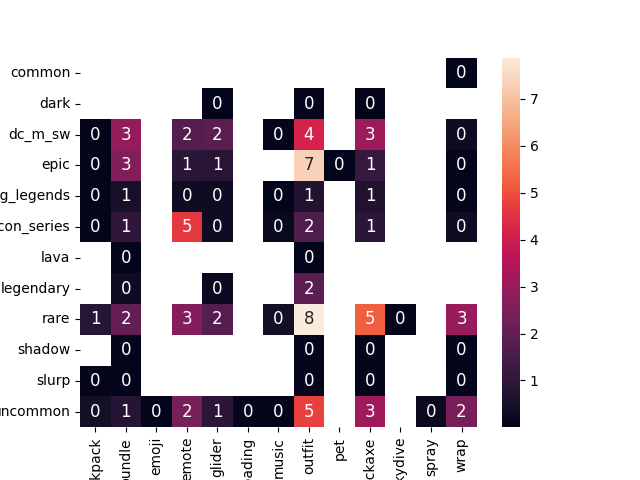

In [34]:
# Don't plot over the previous plot!
plt.figure()

# Number of items / rarity combinations shown per day
df_modern = df.loc[df["year"] > 2021]
num_modern_days = len(df_modern.date.unique())
df_pivot = df_modern.pivot_table("one", "rarity_v2","item_type", aggfunc="sum") / num_modern_days
sns.heatmap(df_pivot, annot=True, fmt=".0f", annot_kws={"size": 12})

### 4.4 Pricing from 2022 onwards

Besides bundles, legendary items are the most expensive.

- Each square show mean price for item, rarity combination.
- dc_m_sw is short for DC, Marvel and Star Wars.

<Axes: xlabel='item_type', ylabel='rarity_v2'>

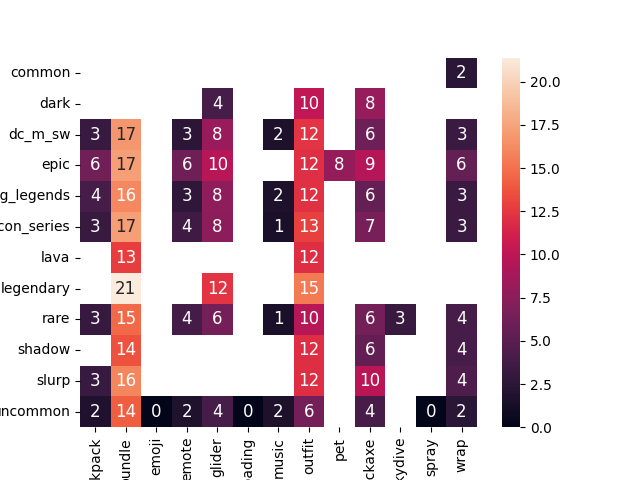

In [35]:
# Don't plot over the previous plot!
plt.figure()

# Mean prices of modern 
df_pivot_prices = df.loc[(df["year"] > 2021)].pivot_table("USD", "rarity_v2","item_type", aggfunc="mean")
sns.heatmap(df_pivot_prices, annot=True, fmt=".0f", annot_kws={"size":12})

And bundles vary the most in price.

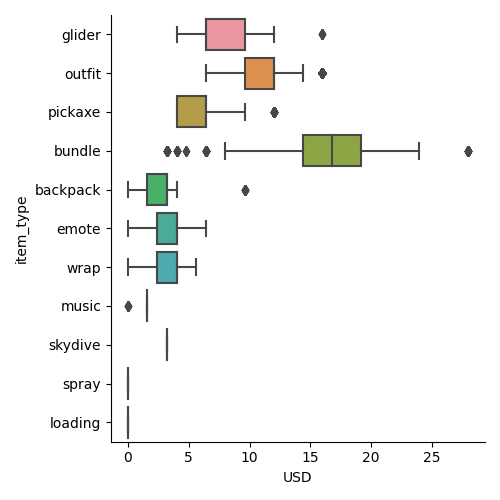

In [36]:
# New content each month, year > 2022, x = USD
sns.catplot(df.loc[(df["year"] > 2022)], x="USD",  
            # col="month",
            # row="item_type", 
            # col_wrap=2,
            y="item_type",
            kind="box"
            # hue="item_type", 
            # multiple="stack",
            # kde=True
            )

## 5. Conclusion

Not only the store has grown over time, but also the number of items displayed per day. This is explained not only by the increase in the number of old items, but also by the increase in the number of bundles, witch push the daily store spending depth up. All of that without puting too much pressure on the production team.

# Gibberish...

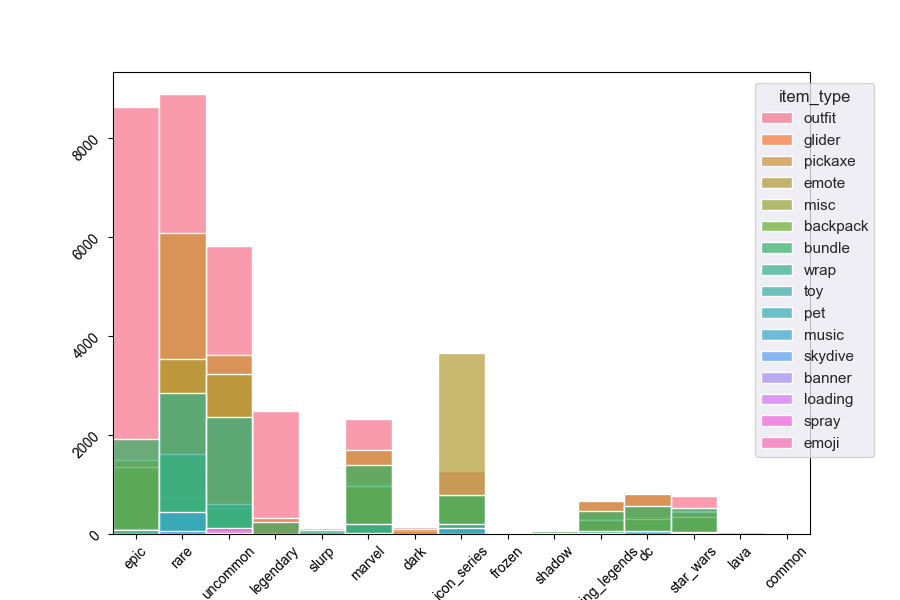

In [37]:
# How frequent are different types/rarity?
f, ax = plt.subplots(figsize=(9,6))
ax.tick_params(labelrotation=45)

p = so.Plot(df.loc[df['year'] > 2016], 'rarity', color='item_type')
p.add(so.Bars(), so.Hist()).on(ax).show()

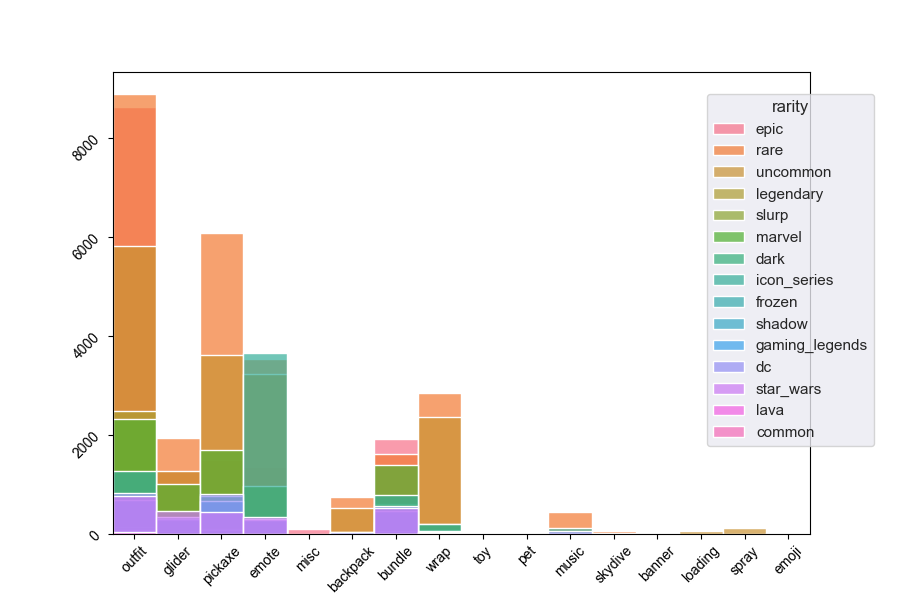

In [38]:
f, ax = plt.subplots(figsize=(9,6))
ax.tick_params(labelrotation=45)
p2 = so.Plot(df, 'item_type', color='rarity')
p2.add(so.Bars(), so.Hist()).on(ax).show()

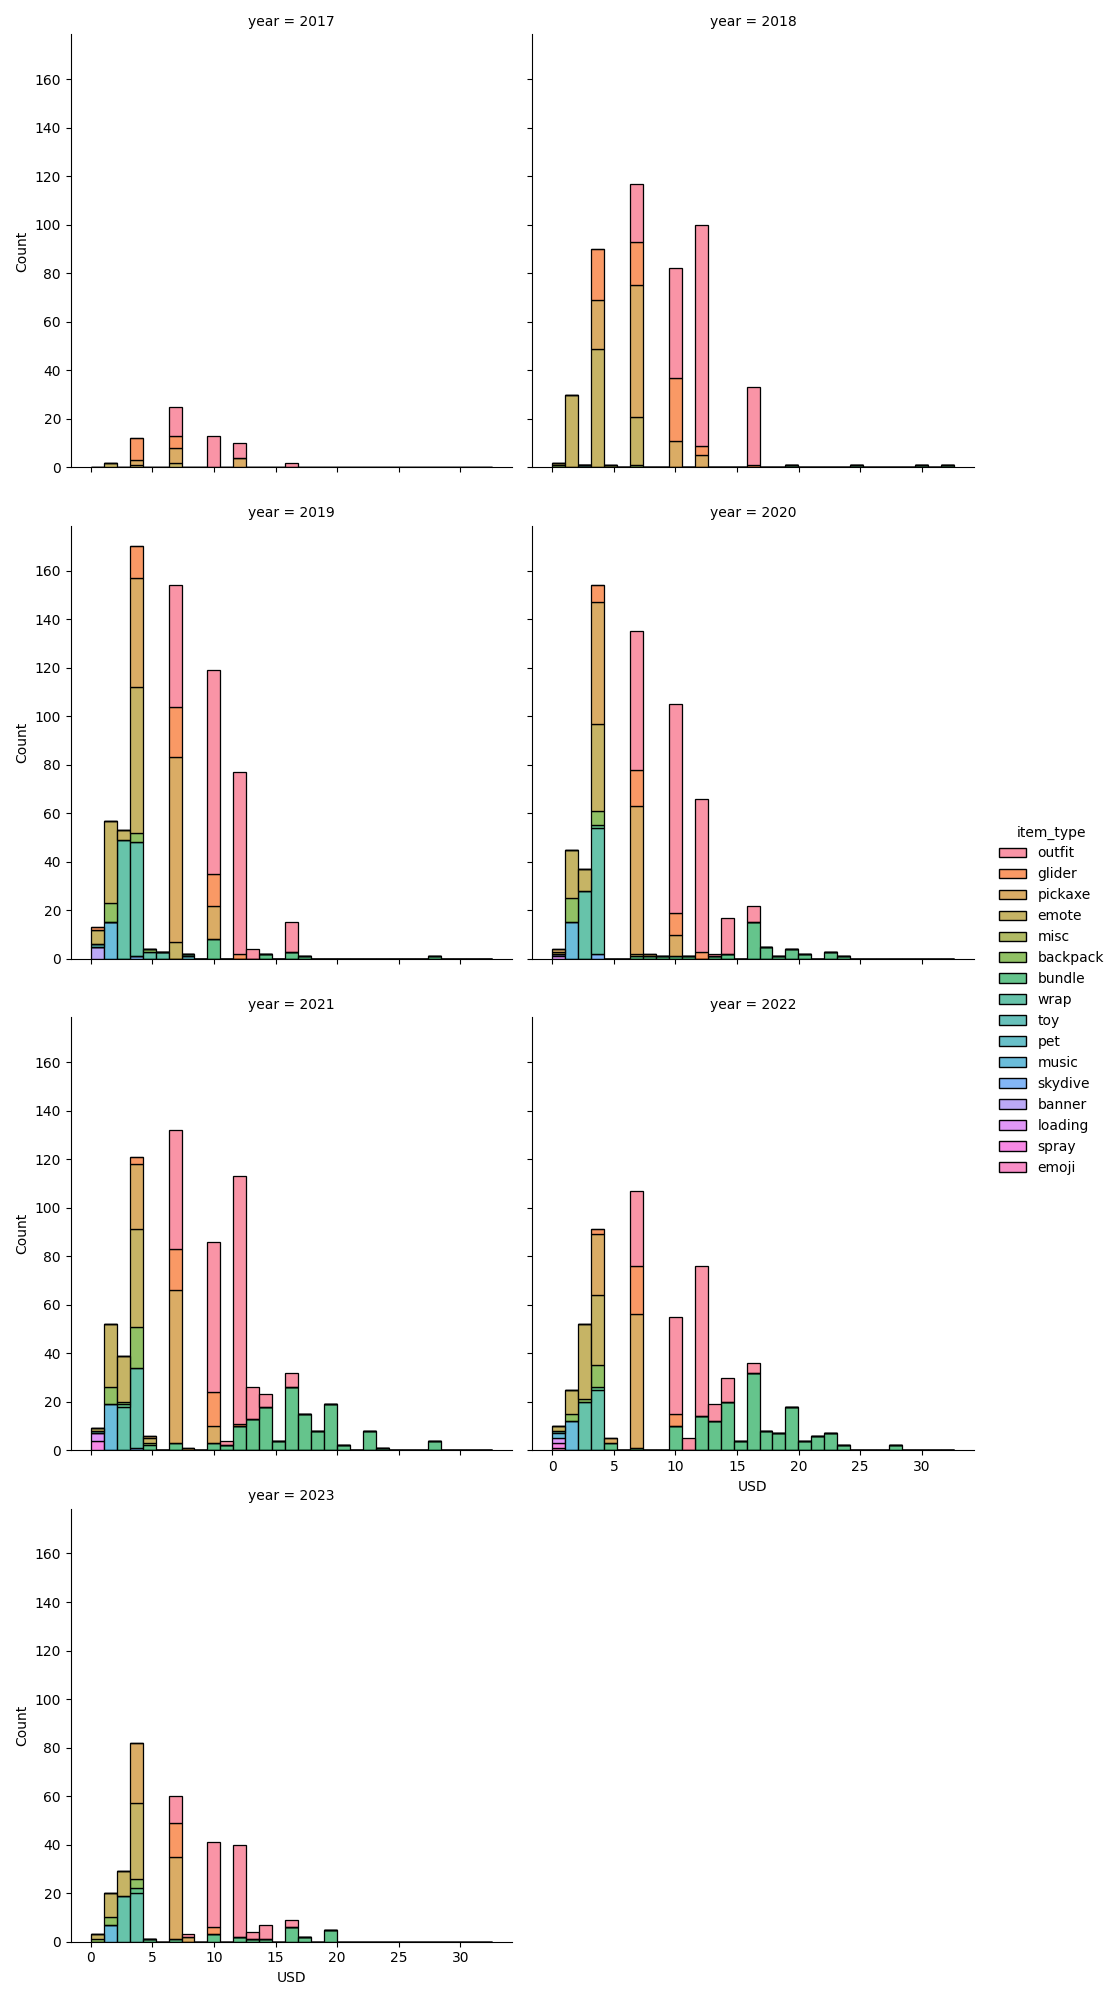

In [39]:
# New content each year, x = USD
sns.displot(df.loc[df['first'] == True], x='USD', col ='year', 
            col_wrap=2,
            hue='item_type', 
            multiple='stack',
            )

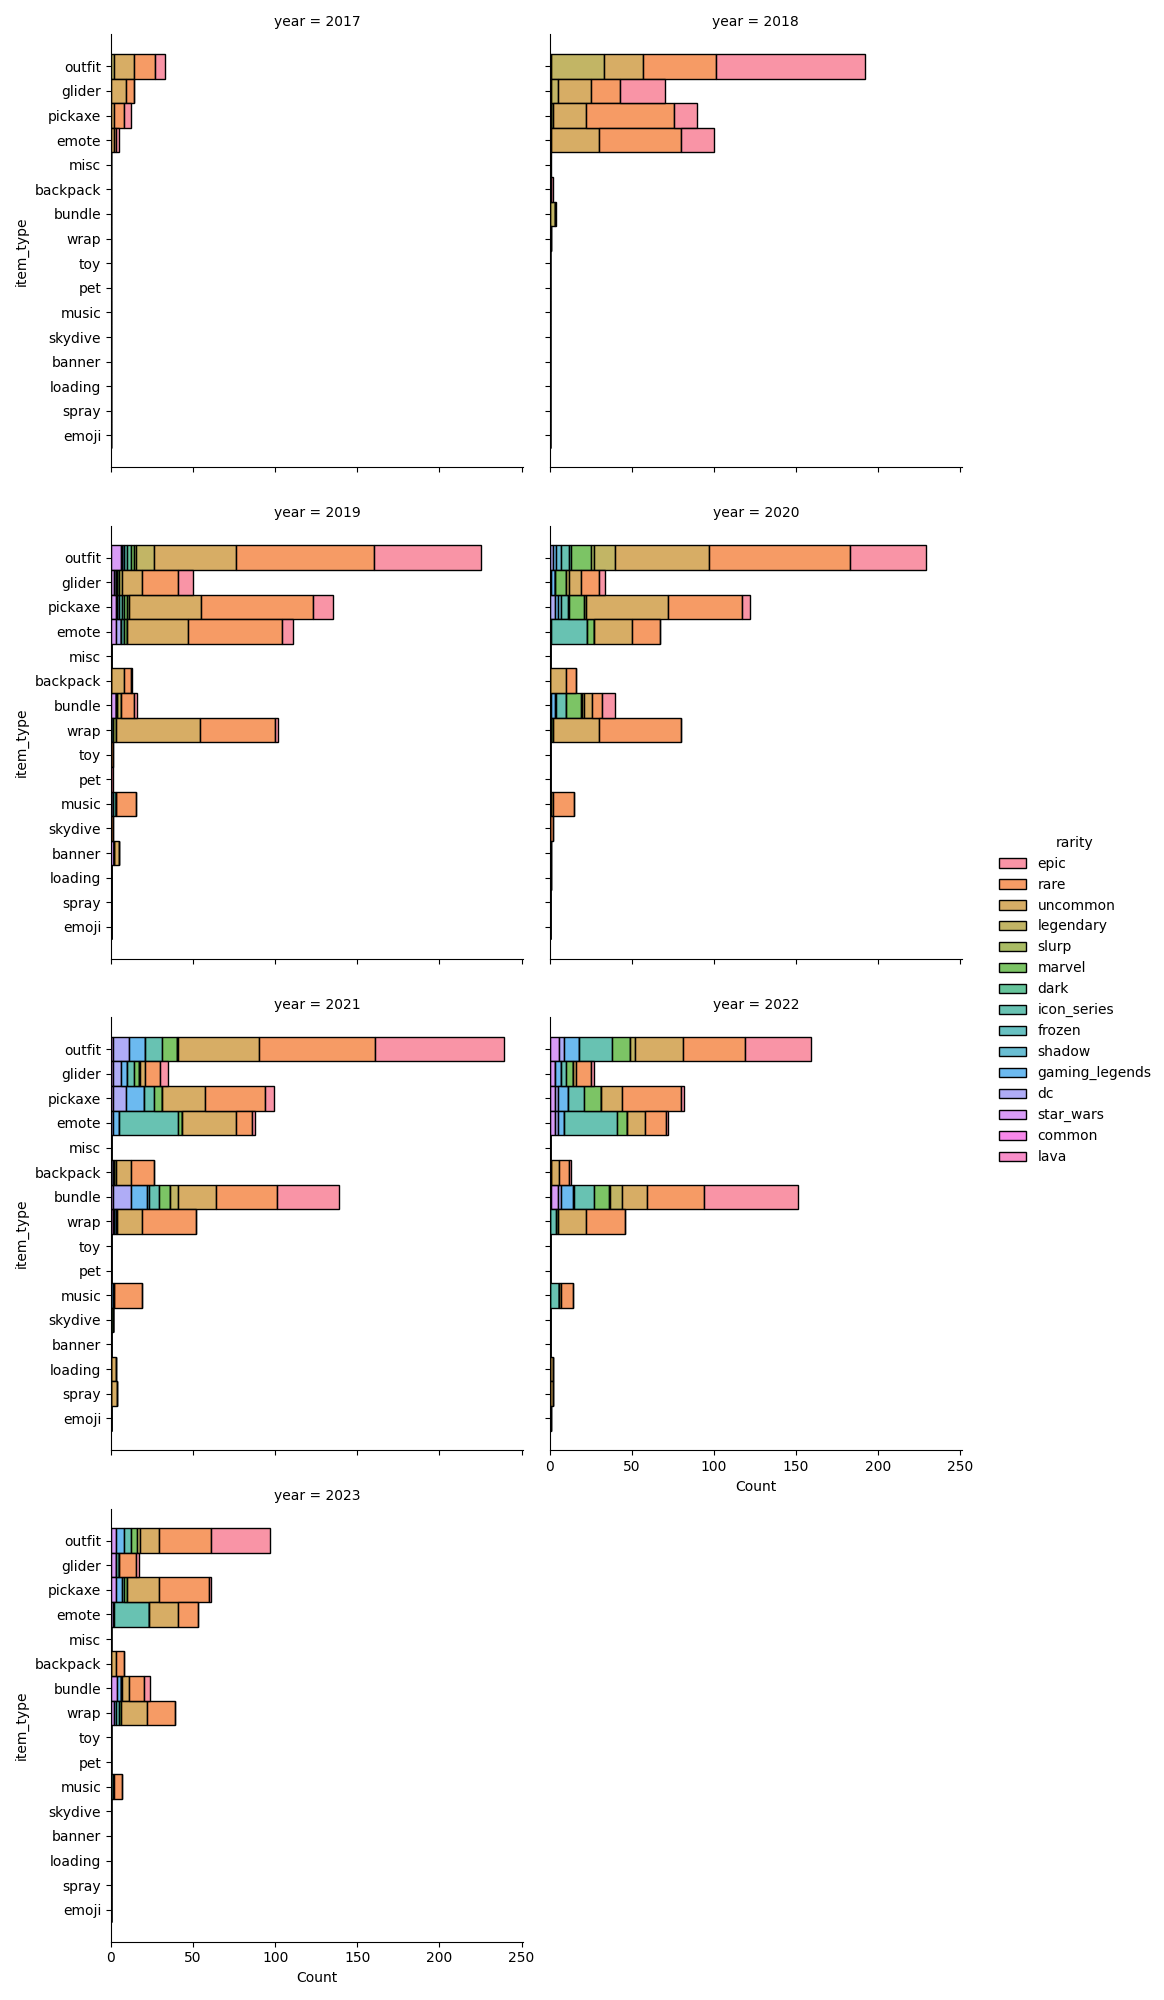

In [40]:
# New content each year, x = USD
sns.displot(df.loc[df['first'] == True], y='item_type', col ='year', 
            col_wrap=2,
            hue='rarity', 
            multiple='stack',
            )

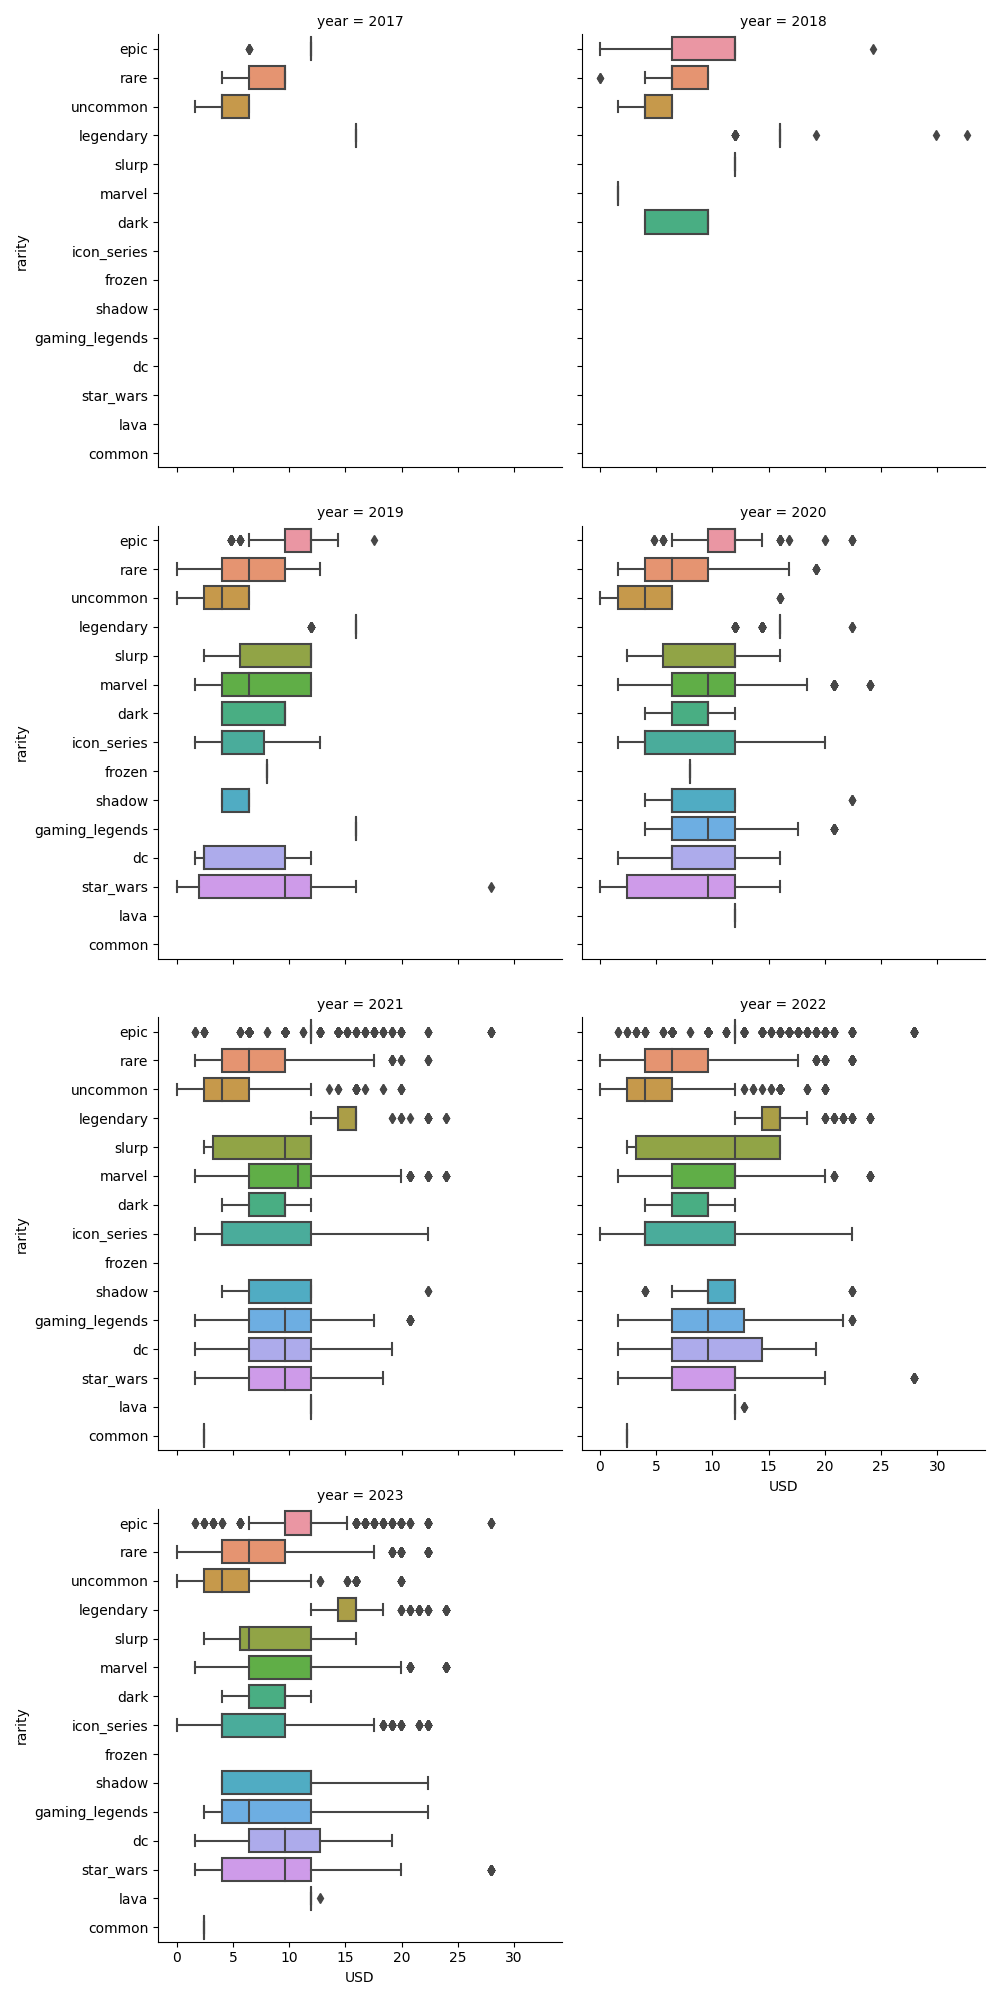

In [41]:
plot = sns.catplot(data=df, kind='box', y='rarity', x='USD', col='year', col_wrap=2)
# plot.set(title="Rarity prices")

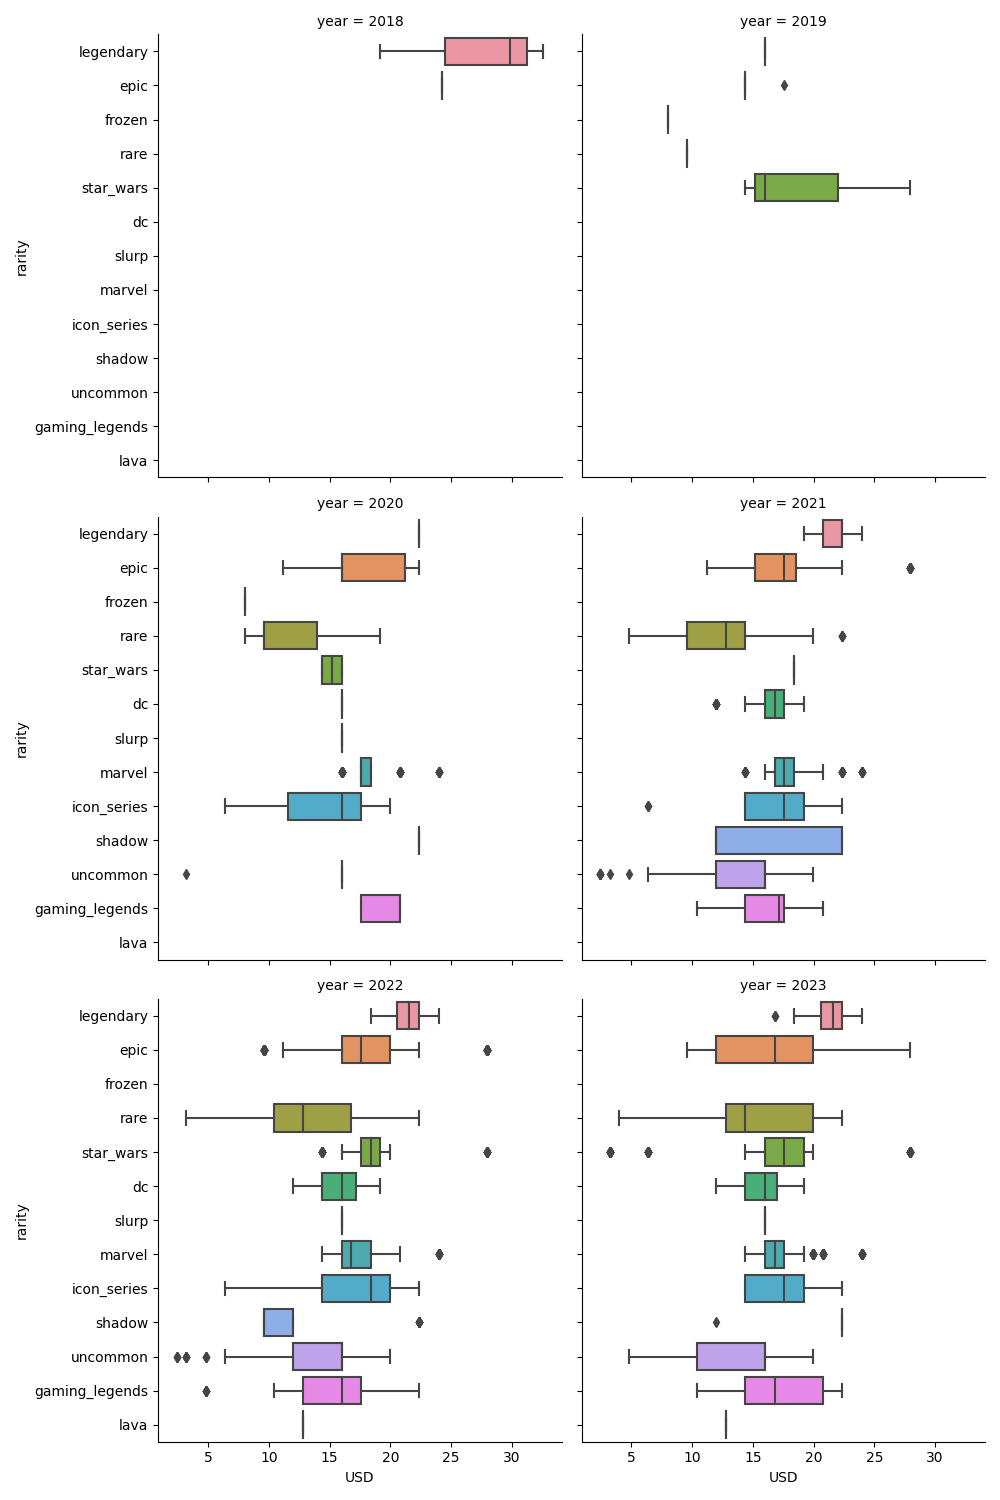

In [42]:
# Different bundles types
plot = sns.catplot(data=df.loc[df['item_type'] == 'bundle'], kind='box', x='USD', y='rarity', col='year', col_wrap=2)

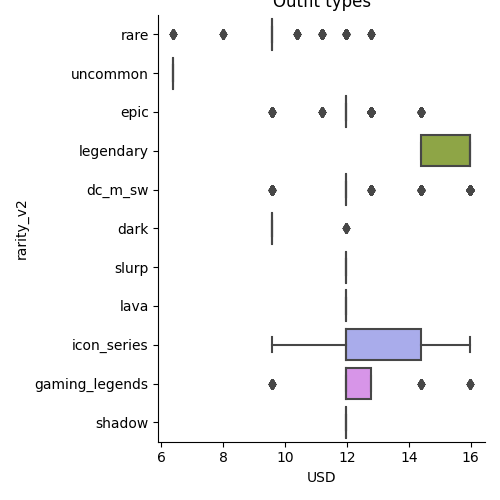

In [43]:
# Different Oufit
plot = sns.catplot(data=df.loc[(df['item_type'] == 'outfit') & (df['year'] > 2021)], kind='box', x='USD', y='rarity_v2')
plot.set(title="Outfit types")